# Zahra Khatibi - Implementing a simple 3-layer neural network from scratch

In [13]:
#Importing Libraries
import numpy as np #For calculations
import sklearn #For the dataset
from sklearn import datasets
import matplotlib.pyplot as plt #For plotting
from random import sample
from mpl_toolkits import mplot3d #For 3D plotting
%matplotlib inline

## Question 1

In [14]:
#Generating the dataset
np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise=0.20)
#plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

# Helper function to predict an output (0 or 1)
def predict(model, X):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

def build_model(nn_hdim, num_passes=20000, print_loss=False):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    #This is what we return at the end
    model = {}
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        # Forward propagation
        z1 = x.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset.
        if print_loss and i % 1000 == 0:
            print ("Iteration:", i, "Loss:", calculate_loss(model))
    return model

In [15]:
num_examples = len(x) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [16]:
model = build_model(3,print_loss=True)

Iteration: 0 Loss: 0.43238663152549245
Iteration: 1000 Loss: 0.06894653811984068
Iteration: 2000 Loss: 0.0690332780882679
Iteration: 3000 Loss: 0.0707519477749643
Iteration: 4000 Loss: 0.07074831586381623
Iteration: 5000 Loss: 0.07075119960513393
Iteration: 6000 Loss: 0.07075407267655068
Iteration: 7000 Loss: 0.07075605989867732
Iteration: 8000 Loss: 0.07075727623188623
Iteration: 9000 Loss: 0.07075795865140108
Iteration: 10000 Loss: 0.07075830168089732
Iteration: 11000 Loss: 0.0707584403620038
Iteration: 12000 Loss: 0.07075846229682578
Iteration: 13000 Loss: 0.07075842204072326
Iteration: 14000 Loss: 0.07075835243079136
Iteration: 15000 Loss: 0.07075827251546604
Iteration: 16000 Loss: 0.07075819281667972
Iteration: 17000 Loss: 0.0707581187128411
Iteration: 18000 Loss: 0.07075805256440867
Iteration: 19000 Loss: 0.07075799502369441


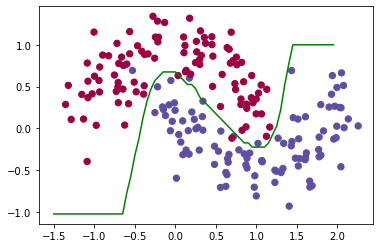

In [17]:
def plot_decision_boundary(model):
    boundary_points = []
    for x in np.arange(-1.5,2,0.05):
        for y in np.arange(-1,1,0.05):
            point = np.array([x,y])
            if(predict(model, point)[0]==0):
                boundary_points.append([x,y-0.025])
                break
        else: boundary_points.append([x,1])
    points = np.array(boundary_points)
    np.random.seed(0)
    x, y = sklearn.datasets.make_moons(200, noise=0.20)
    plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.plot(points[:,0], points[:,1], c='green')
    plt.show()
    return
plot_decision_boundary(model)

## Question 2

1 norouns in hidden layer:


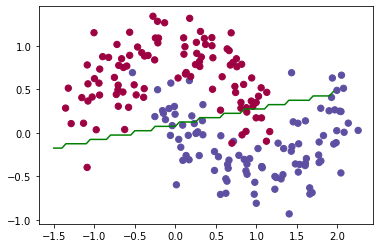

2 norouns in hidden layer:


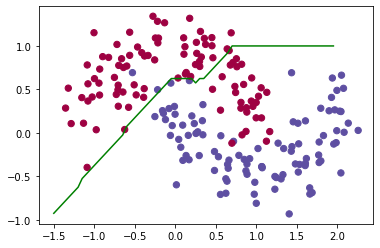

3 norouns in hidden layer:


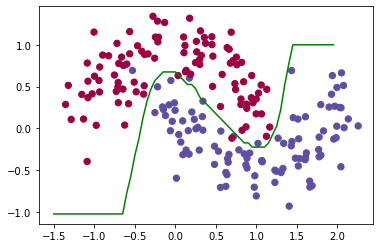

4 norouns in hidden layer:


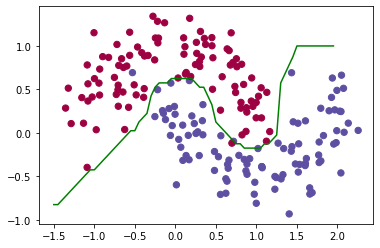

5 norouns in hidden layer:


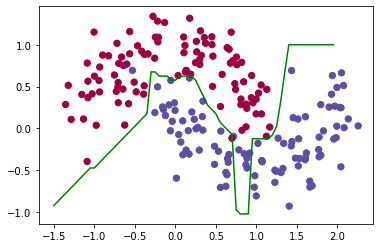

20 norouns in hidden layer:


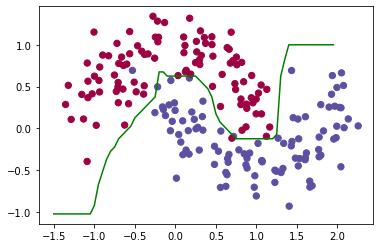

40 norouns in hidden layer:


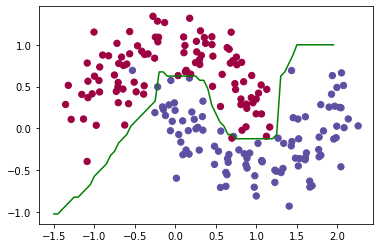

In [18]:
for hid in [1, 2, 3, 4, 5, 20, 40]:
    model = build_model(hid)
    print(hid,'norouns in hidden layer:')
    plot_decision_boundary(model)

## Question 3

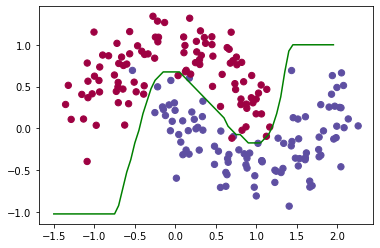

In [19]:
def build_model3(nn_hdim, num_passes=20000, print_loss=False):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    #This is what we return at the end
    model = {}
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        for xHalf,yHalf in [[x[:num_examples//2],y[:num_examples//2]],
                            [x[num_examples//2:],y[num_examples//2:]]]:
            # Forward propagation
            z1 = xHalf.dot(W1) + b1
            a1 = np.tanh(z1)
            z2 = a1.dot(W2) + b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            # Backpropagation
            delta3 = probs
            delta3[range(num_examples//2), yHalf] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(xHalf.T, delta2)
            db1 = np.sum(delta2, axis=0)
            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1
            # Gradient descent parameter update
            W1 += -epsilon * dW1
            b1 += -epsilon * db1
            W2 += -epsilon * dW2
            b2 += -epsilon * db2
            # Assign new parameters to the model
            model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
            # Optionally print the loss.
            # This is expensive because it uses the whole dataset.
            if print_loss and i % 1000 == 0:
                print ("Iteration:", i, "Loss:", calculate_loss(model))
    return model
model = build_model3(3)
plot_decision_boundary(model)

## Question 4

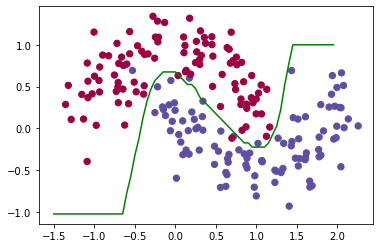

In [20]:
def build_model4(nn_hdim, num_passes=20000, print_loss=False):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    epsilon_var = epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    #This is what we return at the end
    model = {}
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        # Forward propagation
        z1 = x.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset.
        if print_loss and i % 1000 == 0:
            print ("Iteration:", i, "Loss:", calculate_loss(model))
        epsilon_var *= 0.999
    return model
model = build_model4(3)
plot_decision_boundary(model)

## Question 5

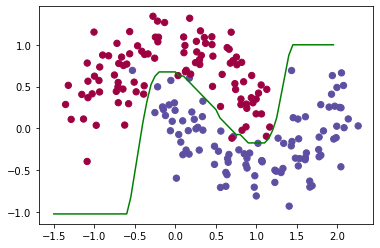

In [21]:
def sigmoid(a):
    return 1 / (1 + np.exp(-1*a))
def build_model5(nn_hdim, num_passes=20000, print_loss=False):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    #This is what we return at the end
    model = {}
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        # Forward propagation
        z1 = x.dot(W1) + b1
        a1 = sigmoid(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (sigmoid(z1)*(1-sigmoid(z1)))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset.
        if print_loss and i % 1000 == 0:
            print ("Iteration:", i, "Loss:", calculate_loss(model))
    return model
def predict5(model, X):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)
def plot_decision_boundary5(model):
    boundary_points = []
    for x in np.arange(-1.5,2,0.05):
        for y in np.arange(-1,1,0.05):
            point = np.array([x,y])
            if(predict5(model, point)[0]==0):
                boundary_points.append([x,y-0.025])
                break
        else: boundary_points.append([x,1])
    points = np.array(boundary_points)
    np.random.seed(0)
    x, y = sklearn.datasets.make_moons(200, noise=0.20)
    plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.plot(points[:,0], points[:,1], c='green')
    plt.show()
    return
model = build_model5(3)
plot_decision_boundary5(model)

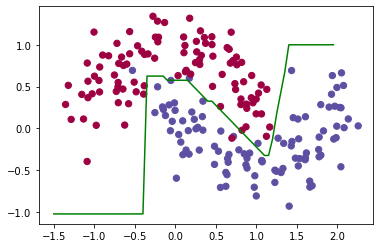

In [22]:
def relu(x):
    return max(0, x)
relu = np.vectorize(relu)

def derv_relu(x):
    return (0 if x<0 else 1) 
derv_relu = np.vectorize(derv_relu)

def build_model5(nn_hdim, num_passes=20000, print_loss=False):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    #This is what we return at the end
    model = {}
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        # Forward propagation
        z1 = x.dot(W1) + b1
        a1 = relu(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (derv_relu(z1))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset.
        if print_loss and i % 1000 == 0:
            print ("Iteration:", i, "Loss:", calculate_loss(model))
    return model
def predict5(model, X):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = relu(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)
def plot_decision_boundary5(model):
    boundary_points = []
    for x in np.arange(-1.5,2,0.05):
        for y in np.arange(-1,1,0.05):
            point = np.array([x,y])
            if(predict5(model, point)[0]==0):
                boundary_points.append([x,y-0.025])
                break
        else: boundary_points.append([x,1])
    points = np.array(boundary_points)
    np.random.seed(0)
    x, y = sklearn.datasets.make_moons(200, noise=0.20)
    plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.plot(points[:,0], points[:,1], c='green')
    plt.show()
    return
model = build_model5(3)
plot_decision_boundary5(model)

both relu and sigmoid work nice as tanh but relu have little more linear boundary

## Question 6

In [23]:
nn_output_dim = 3

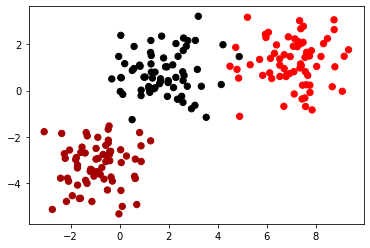

In [24]:
x, y = sklearn.datasets.make_blobs(n_samples=200, centers=3,random_state=53)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.flag)

In [25]:
model = build_model(3)

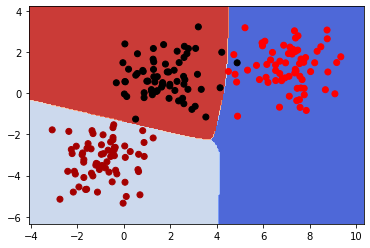

In [26]:
def plotMultiWay(M):
    xs, ys = np.meshgrid(np.arange(x[:,0].min()-1,x[:,0].max()+1,0.05),
                         np.arange(x[:,1].min()-1,x[:,1].max()+1,0.05))
    preds = predict(M,np.c_[xs.ravel(), ys.ravel()])  
    plt.contourf(xs, ys, preds.reshape(xs.shape) , cmap=plt.cm.coolwarm) 
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.flag)
plotMultiWay(model)

## Question 7

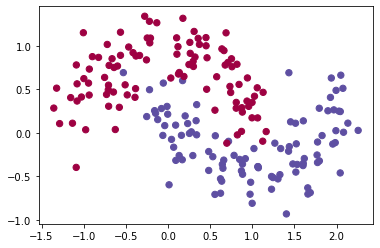

In [30]:
def predict(model, x):
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    z3 = a2.dot(W3) + b3
    exp_scores = np.exp(z3)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

def build_model(nn_hdim1,nn_hdim2, num_passes=20000, print_loss=False):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim1) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim1))
    W2 = np.random.randn(nn_hdim1, nn_hdim2) / np.sqrt(nn_hdim1)
    b2 = np.zeros((1, nn_hdim2))
    W3 = np.random.randn(nn_hdim2, nn_output_dim) / np.sqrt(nn_hdim2)
    b3 = np.zeros((1, nn_output_dim))
    #This is what we return at the end
    model = {}
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        # Forward propagation
        z1 = x.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        a2 = np.tanh(z2)
        z3 = a2.dot(W3) + b3
        exp_scores = np.exp(z3)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Backpropagation
        delta4 = probs
        delta4[range(num_examples), y] -= 1
        dW3 = (a2.T).dot(delta4)
        db3 = np.sum(delta4, axis=0, keepdims=True)
        delta3 = delta4.dot(W3.T) * (1 - np.power(a2, 2))
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW3 += reg_lambda * W3
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        W3 += -epsilon * dW3
        b3 += -epsilon * db3
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset.
        if print_loss and i % 1000 == 0:
            print ("Iteration:", i, "Loss:", calculate_loss(model))
    return model

num_examples = len(x) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength3
np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)

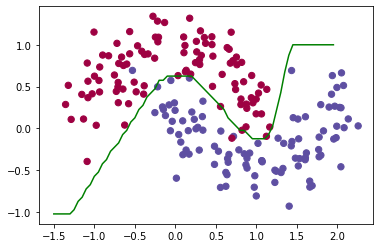

In [31]:
model = build_model(3, 2)
plot_decision_boundary(model)

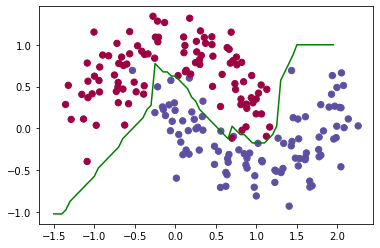

In [32]:
model = build_model(5, 3)
plot_decision_boundary(model)

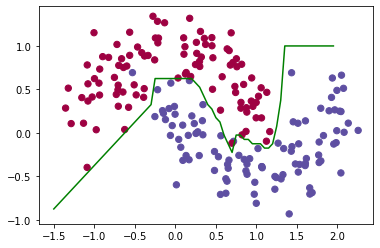

In [33]:
model = build_model(5, 6)
plot_decision_boundary(model)

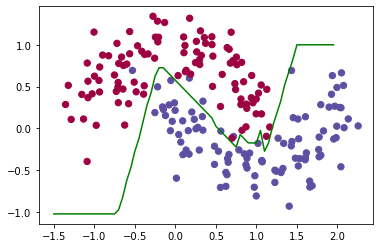

In [34]:
model = build_model(3, 7)
plot_decision_boundary(model)

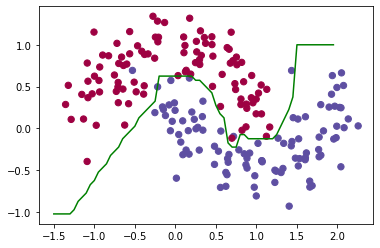

In [36]:
model = build_model(10, 10)
plot_decision_boundary(model)

#### as we can see, when we increase first hidden layer norons, we get better result and incresing in both first and second layers cause better result but a little overfitting. also first layer is more important than the second layer